
# Wprowadzenie
Celem tego projektu jest analiza manuskryptu Wojnicza, znanego jako jeden z najbardziej zagadkowych rękopisów średniowiecznych.  
Moja praca skupi się na zbadaniu czy struktura tekstowa tego dokumentu może być porównywalna z zasadami obserwowanymi w językach naturalnych,   
a konkretnie w języku Islandzikim. W tym celu postanowiłem wykorzystać tekst "Um góðu verkin_djvu".


### Wymagania   
W celu uruchomienia projektu należy zainstalować następujące biblioteki pythona: matplolib, pandas    
można to zrobić za pomocą komendy: ***pip install -r requirements.txt*** lub ***pip install matplotlib pandas*** 

In [19]:
from matplotlib import pyplot as plt
import os, re

# text preprocessing
from striper import stip_herbal_pages, count_words, get_words, prepare_icelandic

# Zipf's law
import pandas as pd # for dataframes in zipf
from zipf import zipf_ranks_list, zipf_constant, zipf_inv_word_frequency

# n-grams and bigrams
from ngrams import get_ngrams, ngrams_freq, bigraph_freq

# Path to the manuscript
current_dir = os.getcwd()
script_dir = os.path.join(current_dir)

## Preprocessing manuskryptu Wojnicza oraz wyliczenie częstości występowania słów

In [20]:
# manuscript
raw_file = os.path.join(script_dir, 'data', 'manuscript.txt')
rdy_manuscript_file = os.path.join(script_dir, 'data', 'herbal_manuscript.txt')

stip_herbal_pages(in_file=raw_file, out_file=rdy_manuscript_file)
    
manuscript_word_counts = count_words(in_file=rdy_manuscript_file)
print(manuscript_word_counts)


{'DTRG': 1, 'TO8AM': 19, 'OE': 55, 'OEHTCG': 1, 'TAR': 25, 'FZAR': 1, 'AKGHCCG': 1, 'OR': 77, 'OTG': 1, '8TO': 3, 'EDO8G': 1, 'ODO8AR': 1, 'TO8G8O': 1, 'DZG': 25, 'DZO': 3, 'SG': 59, '8DSCCG': 1, 'HZG': 69, 'DOHTO8G': 1, '8AE8OE': 1, 'TODCO': 2, '8AIR': 22, '8AK': 15, '2OTCG': 1, 'TODO8GPOHOG': 1, 'SOE': 96, 'PZOAE': 1, '8AR': 78, 'TCG': 64, 'HO8G': 4, 'OHOAM': 1, 'SOSGTODG': 1, 'TOE': 207, 'HZOE': 41, 'ODAE': 29, '8OETCG': 1, 'TO8O': 1, 'EOE': 2, 'TG': 88, 'HZG4O': 1, 'TOIC2': 1, 'TCOE': 28, '8OE': 36, 'HZCG': 32, 'GDOE': 7, '8OEO': 1, 'TO8GODOE': 1, 'DOE': 17, 'DCTG': 2, 'DG': 11, 'TO8G': 36, '8AMSOR': 1, 'ODOE': 13, '8TOR': 9, 'OHTO': 2, 'SO8GHAOR': 1, 'TOHTCG': 3, '8AE': 39, '2TO8G': 2, 'POE': 1, 'TO8ARDG8ANG': 1, 'GPTOE': 2, '8AM': 299, 'OHTAE': 2, 'GPTAM': 1, 'DZOE2G8ORTORG': 1, 'TDAR': 6, '2': 62, 'SOR': 50, 'HZO4OHAM': 1, 'G': 7, 'TOR': 137, 'G8G': 2, 'TAMSAII8G': 1, 'THO88G': 1, 'PZG': 9, '8AE2': 2, 'TODAM': 5, '8OHOTOR': 1, 'AE': 14, 'SO8AM': 8, '8AL': 3, 'GHTAM': 1, '8AL2AM'

## Preprocessing tekstu "Um góðu verkin_djvu" oraz wyliczenie częstości występowania słów

In [21]:
# irelandic book
raw_file = os.path.join(script_dir, 'data', 'Um góðu verkin_djvu.txt')
rdy_icelandic_file = os.path.join(script_dir, 'data', 'icelandic.txt')

prepare_icelandic(in_file=raw_file, out_file=rdy_icelandic_file) 

icelandic_word_counts = count_words(in_file=rdy_icelandic_file)
print(icelandic_word_counts)


{'Einu': 1, 'sinni': 12, 'hét': 1, 'Lúther': 16, 'því': 254, 'í': 470, 'predikunað': 1, 'skrifa': 4, 'um': 143, 'góðu': 16, 'verkin': 19, 'GeorgSpalatín': 1, 'vinur': 3, 'hans': 90, 'minnti': 1, 'hann': 279, 'áþetta': 1, 'heit': 3, 'febrúar': 1, 'Réð': 1, 'hannhonum': 1, 'jafnframt': 3, 'til': 317, 'að': 1161, 'tileinka': 1, 'ritiðJóhanni': 1, 'hertoga': 2, 'bróður': 2, 'Friðrikskjrfursta': 1, 'en': 183, 'báðir': 1, 'voru': 9, 'þeir': 153, 'hlynntirLúther': 1, 'Lúhter': 1, 'gekk': 1, 'verkinu': 1, 'meðgleði': 3, 'og': 1511, 'lauk': 2, 'lok': 1, 'maí': 1, 'Taldihann': 1, 'sig': 69, 'aldrei': 16, 'hafa': 63, 'skrifað': 6, 'beturRitið': 1, 'var': 24, 'alþýðurit': 1, 'ekkivísindarit': 1, 'Fekk': 1, 'það': 341, 'góðar': 1, 'móttkur': 1, 'vargefið': 1, 'út': 16, 'átta': 1, 'sinnum': 2, 'sama': 7, 'árið': 2, 'enjafnframt': 1, 'þá': 119, 'á': 348, 'ferðinni': 1, 'hin': 21, 'miklusiðbótarrit': 1, 'Lúthers': 4, 'TIL': 1, 'KRISTINSAÐALS': 1, 'UM': 2, 'BABÝLONARÚTLEGÐKIRKJUNNAR': 1, 'FRELSI': 1, '

## Prawo Zipfa
Początkowo to prawo zostało określone dla języków naturalnych, gdzie zaobserwowano, że jeśli ułożyć słowa   
z ich korpusów językowych według malejącej częstotliwości występowania,  
to miejsce słowa na liście (jego ranga) jest odwrotnie proporcjonalne do jego częstotliwości występowania.  
Oznacza to, że iloczyn częstotliwości występowania słowa i jego rangi powinien być wartością stałą.
  
  

#### Prawo Zipfa: rank * freq to rank

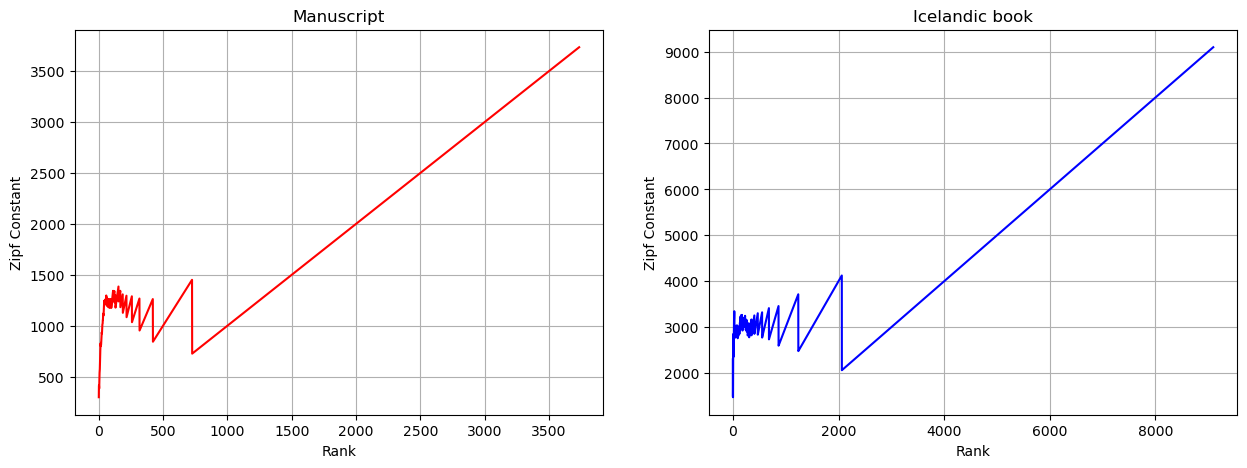

In [22]:
manuscript_zipf_constant = zipf_constant(word_counts=manuscript_word_counts)
icelandic_zipf_constant = zipf_constant(word_counts=icelandic_word_counts)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(manuscript_zipf_constant, color='red')
ax[0].set_title('Manuscript')
ax[0].set_xlabel('Rank')
ax[0].set_ylabel('Zipf Constant')
ax[0].grid(True)

ax[1].plot(icelandic_zipf_constant, color='blue')
ax[1].set_title('Icelandic book')
ax[1].set_xlabel('Rank')
ax[1].set_ylabel('Zipf Constant')
ax[1].grid(True)

plt.show()

#### Prawo Zipfa: 1/frequency to rank

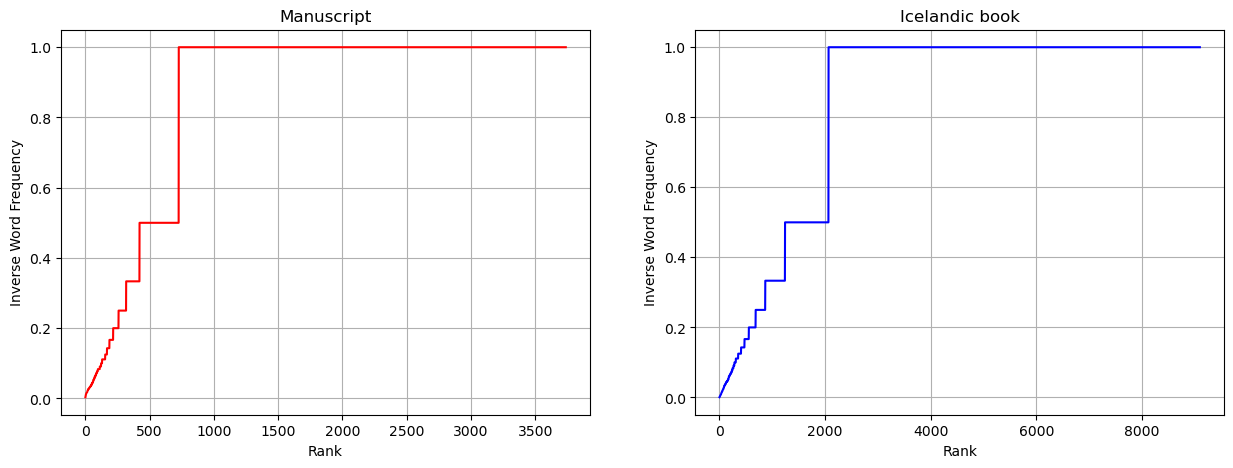

In [23]:
manuscript_freq = zipf_inv_word_frequency(word_counts=manuscript_word_counts)
icelandic_freq = zipf_inv_word_frequency(word_counts=icelandic_word_counts)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(manuscript_freq, color='red')
ax[0].set_title('Manuscript')
ax[0].set_xlabel('Rank')
ax[0].set_ylabel('Inverse Word Frequency')
ax[0].grid(True)

ax[1].plot(icelandic_freq, color='blue')
ax[1].set_title('Icelandic book')
ax[1].set_xlabel('Rank')
ax[1].set_ylabel('Inverse Word Frequency')
ax[1].grid(True)

plt.show()


#### Prawo Zipfa: frequency to rank

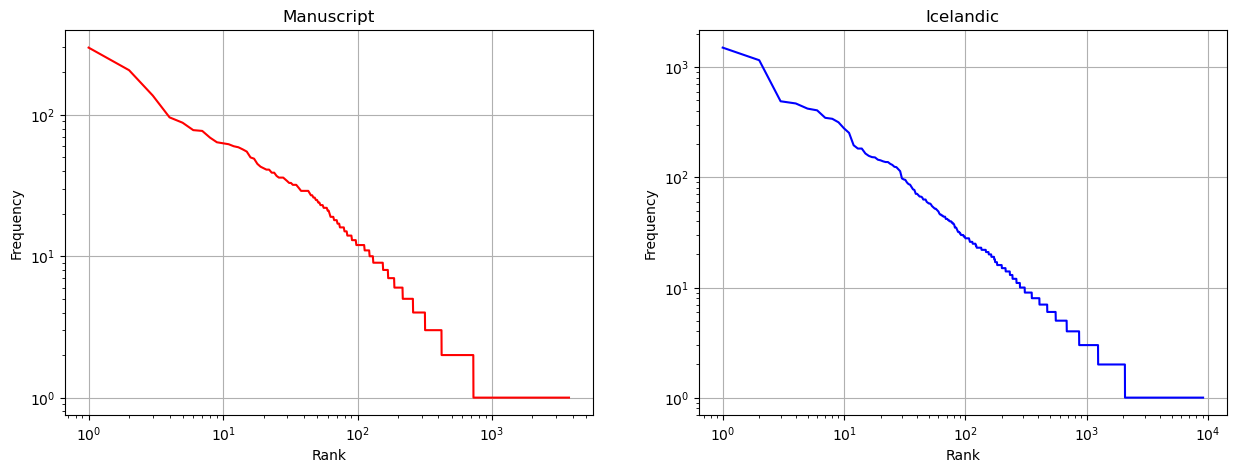

In [24]:
manuscript_ranks = zipf_ranks_list(word_counts=manuscript_word_counts)
icelandic_ranks = zipf_ranks_list(word_counts=icelandic_word_counts)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(manuscript_ranks.keys(), manuscript_ranks.values(), color='red')
axs[0].set_title('Manuscript')
axs[0].set_xlabel('Rank')
axs[0].set_ylabel('Frequency')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].grid(True)

axs[1].plot(icelandic_ranks.keys(), icelandic_ranks.values(), color='blue')
axs[1].set_title('Icelandic')
axs[1].set_xlabel('Rank')
axs[1].set_ylabel('Frequency')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].grid(True)

plt.show()


## N-gramy

N-gramy to ciągi kolejnych słów w tekście, gdzie ”n” określa ich liczbę. Analiza n-gramów jest niezwykle   
przydatna w lingwistyce obliczeniowej i NLP, ponieważ pozwala na identyfikację i analizę powtarzających   
się wzorców językowych. Dzię- ki temu możemy zrozumieć, jakie kombinacje słów są typowe dla danego tekstu  
i jak często się powtarzają, co pozwoli nam zbadać, czy Manuskrypt Wojnicza zawiera powtarzające się   
sekwencje słów, które mogłyby wskazywać na obecność pewnej struktury językowej, porównywalnej z językami naturalnymi.
  
Utworzyłem funkcję która zlicza n-gramy, oraz wybiera takie, które pojawiły się w badanym tekście   
co najmniej dwa razy, a następnie sortuje je pod względem występowania.

In [31]:

icelandic_words = get_words(in_file=rdy_icelandic_file)
manuscript_words = get_words(in_file=rdy_manuscript_file)

print(f'Icelandic words: {len(icelandic_words)}')
for n in range(2, 15):
    ngrams = get_ngrams(icelandic_words, n)
    ngram_counts = ngrams_freq(ngrams)
    print(f'{n}-grams: {ngram_counts[:5]}')

print(f'\nVoynich words: {len(manuscript_words)}')
for n in range(2, 15):
    ngrams = get_ngrams(manuscript_words, n)
    ngram_counts = ngrams_freq(ngrams)
    print(f'{n}-grams: {ngram_counts[:5]}')

Icelandic words: 28586
2-grams: [(('eins', 'og'), 117), (('því', 'að'), 79), (('Því', 'að'), 62), (('til', 'að'), 53), (('svo', 'að'), 51)]
3-grams: [(('til', 'þess', 'að'), 27), (('eins', 'og', 'hann'), 12), (('af', 'því', 'að'), 10), (('án', 'þess', 'að'), 10), (('nafn', 'Guðs', 'og'), 8)]
4-grams: [(('eins', 'og', 'hann', 'vill'), 3), (('Því', 'að', 'það', 'er'), 3), (('af', 'því', 'að', 'hann'), 3), (('telja', 'ekki', 'til', 'góðra'), 2), (('að', 'vísu', 'sefast', 'en'), 2)]
5-grams: [(('í', 'SálmiDýr', 'er', 'í', 'augum'), 2), (('SálmiDýr', 'er', 'í', 'augum', 'Drottins'), 2), (('eins', 'og', 'Páll', 'segir', 'í'), 2), (('V', 'Mós', 'Þú', 'skaltekki', 'gjra'), 2), (('Mós', 'Þú', 'skaltekki', 'gjra', 'það'), 2)]
6-grams: [(('í', 'SálmiDýr', 'er', 'í', 'augum', 'Drottins'), 2), (('V', 'Mós', 'Þú', 'skaltekki', 'gjra', 'það'), 2), (('Mós', 'Þú', 'skaltekki', 'gjra', 'það', 'sem'), 2), (('Þú', 'skaltekki', 'gjra', 'það', 'sem', 'þér'), 2), (('Einu', 'sinni', 'hét', 'Lúther', 'því', 'í

## Grafy dwudzielne
Grafy dwudzielne są szczególnym rodzajem grafów, w których wierzchołki można podzielić na dwa rozłączne zbiory,   
takie że każda krawędź łączy wierz- chołek z jednego zbioru z wierzchołkiem z drugiego zbioru. W kontekście mojej analizy,   
jeden zbiór wierzchołków będzie reprezentował poszczególne słowa, a drugi – ich kontekst lub inne słowa, z   
którymi współwystępują. Wykorzystanie grafów dwudzielnych pozwoli nam na intuicyjne przedstawienie złożonych relacji   
językowych w obu tekstach. Dzięki temu będziemy mogli zobaczyć, jakie słowa często występują razem,   
jakie formują typowe frazy czy konstrukcje językowe.

Ze względu na złożoność i gęstość połączeń między słowami w analizowanych tekstach, aby uzyskać bardziej użyteczne wyniki,  
postanowiłem skoncentrować się na tworzeniu listy najczęściej występujących słów, uwzględniając przy tym liczbę ich unikalnych połączeń z innymi słowami.

In [32]:


# sort bigraphs by frequency
icelandic_bigraphs = bigraph_freq(icelandic_words)
icelandic_bigraphs = {k: v for k, v in sorted(icelandic_bigraphs.items(), key=lambda item: item[1], reverse=True)}

manuscript_bigraphs = bigraph_freq(manuscript_words)
manuscript_bigraphs = {k: v for k, v in sorted(manuscript_bigraphs.items(), key=lambda item: item[1], reverse=True)}

print(f'Icelandic bigraphs               | Manuscript bigraphs              ')
print(f'---------------------------------|---------------------------------')
for i in range(20):
    print(f'{list(icelandic_bigraphs.keys())[i]:<32} | {list(manuscript_bigraphs.keys())[i]:<32}')
    print(f'{list(icelandic_bigraphs.values())[i]:<32} | {list(manuscript_bigraphs.values())[i]:<32}')
    print(f'---------------------------------|---------------------------------')


Icelandic bigraphs               | Manuscript bigraphs              
---------------------------------|---------------------------------
og                               | 8AM                             
1101                             | 237                             
---------------------------------|---------------------------------
að                               | TOE                             
625                              | 136                             
---------------------------------|---------------------------------
er                               | TOR                             
314                              | 107                             
---------------------------------|---------------------------------
í                                | SOE                             
299                              | 84                              
---------------------------------|---------------------------------
ekki                             | 8AR         

# Wnioski  
## Prawo Zipfa  
Na podstawie utworzonych wykresów, możemy wyciągnąć wnioski dotyczące zastosowania prawa Zipfa do analizy częstotliwości słów w Manuskrypcie Wojnicza   
oraz w tekście w języku Islandzkim. Oba wykresy przedstawiają zależność logarytmiczną rangi słów od logarytmu ich częstotliwości. W idealnym przypadku,  
zgodnie z prawem Zipfa, powinniśmy obserwować liniową relację, gdzie linia trendu przechodzi przez większość punktów danych.  
  
Oba teksty wykazują tendencje zgodne z prawem Zipfa, szczególnie dla naj- częściej występujących słów, co sugeruje, że oba mogą być zapisane w formie języka naturalnego.
  
## N-gramy
Analiza n-gramów dla Manuskryptu Wojnicza wskazuje na obecność ograniczonej liczby powtarzających się sekwencji trzech elementów (3-gramów).  
Mo- że to sugerować, że Manuskrypt Wojnicza nie używa języka w sposób charak- terystyczny dla rozbudowanych systemów komunikacji,   
gdzie oczekiwalibyśmy znacznie większej różnorodności i częstotliwości powtarzających się sekwencji. Może to również wskazywać na   
zastosowanie ograniczonego słownictwa lub for- muł stałych, co jest typowe dla tekstów o specyficznym, być może rytualnym lub symbolicznym charakterze.  
  
Z kolei analiza n-gramów dla tekstu Islandzkiego wykazuje znacznie bogatszą strukturę i różnorodność.  
Duża liczba różnych 2-gramów pojawia się z częstotliwościami sięgającymi nawet 117 powtórzeń.  
To wskazuje na złożoną strukturę językową i szerokie użycie konstrukcji gramatycznych, co jest typowe dla literackiego języka naturalnego.
  
## Grafy dwudzielne  
Na podstawie danych tablicy korelacji dla Sherlocka i Wojnicza, można zauważyć wyraźne różnice w strukturze lingwistycznej obu tekstów.   
W przypadku "Um góðu verkin_djvu", najczęściej współwystępujące słowa to spójniki typowe dla języka Islandzkiego, takie jak spójniki ('og', 'að', 'er'), 
co wskazuje na złożoną strukturę zdaniową.  
  
W Manuskrypcie dominują sekwencje alfanumeryczne (’8AM’, ’TOR’, ’TOE’), które mogą pełnić rolę łączników, ale ich dokładne znaczenie pozostaje nieznane.
